# Principal Component Analysis 

-----
-----

## GOAL: Figure out which handwritten digits are most differentiated with PCA.

**Nowadays, it is very useful to be able to read handwritten digits automatically.**

***This is very much how modern postal services have worked for a long time now, and it is more accurate than a human. We want to know which handwritten numbers are the hardest to tell apart, so we can focus on getting more labeled examples of that data. We will have a dataset of handwritten digits (a very famous data set) and we will perform PCA to get better insight into which numbers are easily separable from the rest.***

-----
-----

# Data

    Background:

    E. Alpaydin, Fevzi. Alimoglu
    Department of Computer Engineering
    Bogazici University, 80815 Istanbul Turkey
    alpaydin '@' boun.edu.tr


#### Data Set Information from Original Authors:

We created a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation, and writer-dependent testing, and the digits written by the other 14 are used for writer-independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure-sensitive tablet with an integrated LCD and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486-based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 milliseconds.

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subjects are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to write only inside these boxes. If they make a mistake or are unhappy with their writing, they are instructed to clear the content of a box by using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input device, but subjects are not aware of this.

SOURCE: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
digits = pd.read_csv('digits.csv')

In [3]:
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [4]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pixel_0_0     1797 non-null   float64
 1   pixel_0_1     1797 non-null   float64
 2   pixel_0_2     1797 non-null   float64
 3   pixel_0_3     1797 non-null   float64
 4   pixel_0_4     1797 non-null   float64
 5   pixel_0_5     1797 non-null   float64
 6   pixel_0_6     1797 non-null   float64
 7   pixel_0_7     1797 non-null   float64
 8   pixel_1_0     1797 non-null   float64
 9   pixel_1_1     1797 non-null   float64
 10  pixel_1_2     1797 non-null   float64
 11  pixel_1_3     1797 non-null   float64
 12  pixel_1_4     1797 non-null   float64
 13  pixel_1_5     1797 non-null   float64
 14  pixel_1_6     1797 non-null   float64
 15  pixel_1_7     1797 non-null   float64
 16  pixel_2_0     1797 non-null   float64
 17  pixel_2_1     1797 non-null   float64
 18  pixel_2_2     1797 non-null 

DataFrame called *pixels* is created that consists only of the pixel feature values by dropping the number_label column.**

In [5]:
pixels = digits.drop('number_label', axis=1)

# Displaying an Image

To illustrate a single image row representation, the first row of the pixels DataFrame is extracted.

In [14]:
image = pixels.iloc[0]
image

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

#### Converting the Series above into NumPy Array

In [15]:
image = pixels.iloc[0].to_numpy()
image

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

#### Reshaping (8 * 8)

In [16]:
image = pixels.iloc[0].to_numpy().reshape((8,8))
image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [24]:
# Visualization by sns.heatmap() & plt.imshow()

<Axes: >

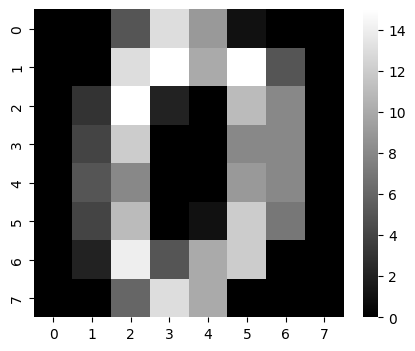

In [21]:
plt.figure(figsize=(5,4))
sns.heatmap(image, cmap='gray')

<Axes: >

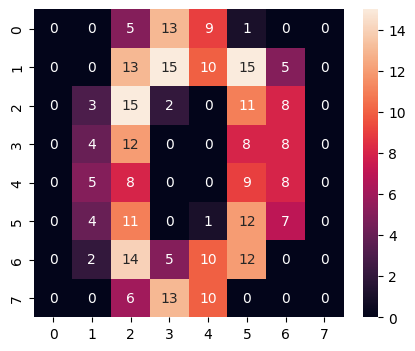

In [22]:
plt.figure(figsize=(5,4))
sns.heatmap(image, annot=True)

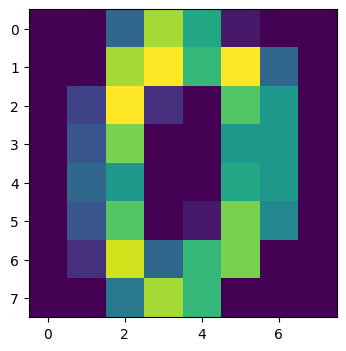

In [23]:
plt.figure(figsize=(5,4))
plt.imshow(image, cmap='viridis')

---

# Scaling Data

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
pixels_scaled = scaler.fit_transform(pixels)

In [29]:
pixels_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

## PCA

In [30]:
from sklearn.decomposition import PCA

In [31]:
model = PCA(n_components=2)

In [50]:
pca_pixels = model.fit_transform( pixels_scaled )

### The variance is explained by 2 principal components

In [51]:
model.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [52]:
np.sum( model.explained_variance_ratio_ )

0.21594970499275323

### The Digits in the 2D PCA Space 

In [56]:
pca_pixels

array([[ 1.91419985, -0.95448537],
       [ 0.58896642,  0.92463498],
       [ 1.30203056, -0.31720062],
       ...,
       [ 1.0225852 , -0.1478943 ],
       [ 1.07603975, -0.38092023],
       [-1.25768798, -2.22756996]])

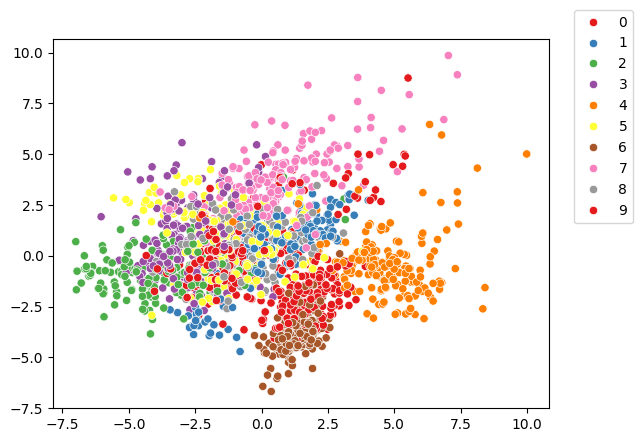

In [64]:
sns.scatterplot( x=pca_pixels[:,0], y=pca_pixels[:,1], hue=digits['number_label'], palette='Set1')
plt.legend(loc=(1.05, .5));

### Which Clusters are the most distinct?

**Labels #4, #2, #6, and #9 are the most distinct.**

## The Top 10 Most Indicative Pixels

In [66]:
model.components_.shape

(2, 64)

In [67]:
pixels_comp = pd.DataFrame(data=model.components_, columns=pixels.columns, index=['PC1', 'PC2'])

In [74]:
pixels_comp = pixels_comp.transpose()

In [87]:
def func(a, b):
    return np.sqrt(a**2 + b**2) / 2

In [88]:
pixels_comp['mean'] = np.vectorize(func)(pixels_comp['PC1'], pixels_comp['PC2'])

In [91]:
pixels_comp.sort_values(by='mean', ascending=False).head(10)

,PC1,PC2,mean
pixel_0_2,-0.285868,0.059565,0.146004
pixel_7_2,-0.279853,0.081400,0.145725
pixel_6_6,-0.121247,-0.257752,0.142423
pixel_1_6,0.083781,0.266536,0.139697
pixel_0_5,0.009498,0.274132,0.137148
pixel_4_1,0.238903,-0.117681,0.133157
pixel_7_5,-0.103198,-0.242618,0.131827
pixel_4_2,0.235006,-0.105395,0.128779
pixel_0_6,0.052477,0.249732,0.127593
pixel_7_4,-0.017774,-0.251933,0.126280


-----
----

# Interactive 3D Plot 

There are lots of ways to do this, including different libraries like Plotly or Bokeh, but we will do this just with Matplotlib and Jupyter Notebook.

In [92]:
model = PCA(n_components=3)

In [93]:
pca_pixels = model.fit_transform( pixels_scaled )

In [94]:
from mpl_toolkits import mplot3d

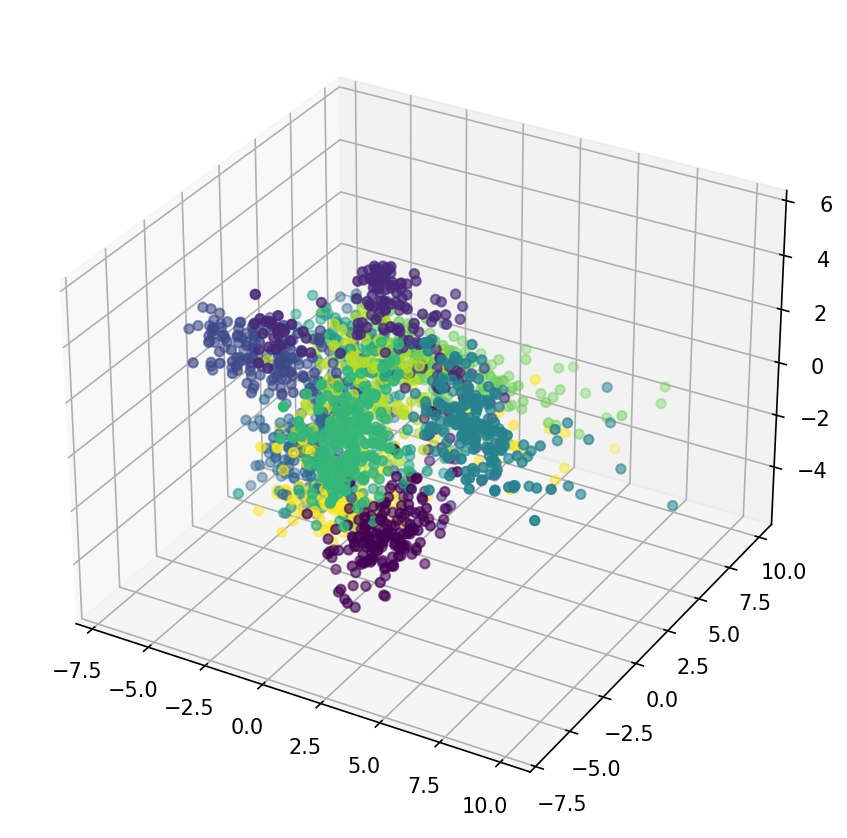

In [100]:
plt.figure(figsize=(7,7), dpi=150)

ax = plt.axes(projection='3d')

ax.scatter3D(pca_pixels[:,0], pca_pixels[:,1], pca_pixels[:,2], c=digits['number_label']);